In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pivottablejs import pivot_ui

pd.set_option('max_columns', None)

# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("./db1.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

In [2]:
qry("SELECT name FROM sqlite_master WHERE type='table'")

,name
0,user
1,method
2,grade
3,ascent


In [3]:
# work w dataframes
df_user = qry("SELECT * FROM USER")
df_grade = qry("SELECT * FROM grade")
df_method = qry("SELECT * FROM method")
df_ascent = qry("SELECT * FROM ascent")

# get all desc. tabs..
desc_user = df_user.describe().T
desc_user['table'] = 'user'

desc_grade = df_grade.describe().T
desc_grade['table'] = 'grade'

desc_method = df_method.describe().T
desc_method['table'] = 'method'

desc_ascent = df_ascent.describe().T
desc_ascent['table'] = 'ascent'

pd.set_option('display.float_format', lambda x: '%.4f' % x)
desc_user.append(desc_grade).append(desc_method).append(desc_ascent)

,count,mean,std,min,25%,50%,75%,max,table
id,62593.0000,33106.4069,19373.4078,1.0000,16325.0000,32721.0000,49980.0000,67025.0000,user
sex,62593.0000,0.1551,2.0665,0.0000,0.0000,0.0000,0.0000,255.0000,user
height,62593.0000,83.8842,88.1554,0.0000,0.0000,0.0000,176.0000,255.0000,user
weight,62593.0000,33.1219,35.0836,0.0000,0.0000,0.0000,68.0000,100.0000,user
started,62593.0000,1071.6877,999.5699,0.0000,0.0000,1992.0000,2006.0000,2090.0000,user
deactivated,62593.0000,0.0409,0.1981,0.0000,0.0000,0.0000,0.0000,1.0000,user
anonymous,62593.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,user
id,83.0000,42.8675,25.1113,1.0000,21.5000,42.0000,64.5000,86.0000,grade
score,83.0000,617.5301,517.0857,0.0000,110.0000,550.0000,1062.5000,1575.0000,grade
fra_routes_input,83.0000,0.4940,0.5030,0.0000,0.0000,0.0000,1.0000,1.0000,grade


In [4]:
df_user = df_user.rename(columns = {'id':'user_id'})
df_ascent = df_ascent.rename(columns = {'id':'ascent_id'})
df_grade = df_grade.rename(columns = {'id':'grade_id'})

In [5]:
df_ascent[df_ascent.crag == 'Smith Rocks']

,ascent_id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,last_year,rec_date,project_ascent_date,name,crag_id,crag,sector_id,sector,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
689,1011,28,59,,0,1,0,950,922316400,1999,0,1107126000,0,Churning in the wake,11610,Smith Rocks,0,,USA,Brilliant,3,,255,0,0,0,0,0
690,1012,28,53,,0,3,0,945,954108000,2000,0,1107126000,0,Don't remember,11610,Smith Rocks,0,,USA,,0,,0,0,0,0,0,0
1483,2226,168,68,,0,1,0,1150,972165600,2000,0,1107126000,0,to bolt or not to be,11610,Smith Rocks,0,,USA,,3,,0,0,0,0,0,0
1484,2227,168,64,,0,3,0,1195,971992800,2000,0,1107126000,0,Rude boys,11610,Smith Rocks,0,,USA,,3,,255,0,0,0,0,0
1485,2228,168,59,,0,3,0,1095,971992800,2000,0,1107126000,0,Churning in the wake,11610,Smith Rocks,0,,USA,,2,,255,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090528,4885532,46004,36,"Traditional, Hard",20,3,0,575,1502316000,2017,1,1503833343,0,Quasar,11610,Smith Rocks,4832,Lower Gorge,USA,,3,,0,0,0,0,0,0
4090529,4885533,46004,38,"Traditional, Hard",20,1,0,480,1502402400,2017,1,1503833470,0,Cornercopia,11610,Smith Rocks,4832,Lower Gorge,USA,,3,,0,0,0,0,0,0
4090542,4885552,46004,31,Traditional,4,1,0,330,1502316000,2017,1,1503834313,0,The Ferret's dead,11610,Smith Rocks,4832,Lower Gorge,USA,,2,,0,0,0,0,0,0
4096307,4892345,66619,38,,0,3,0,595,1490997600,2017,1,1504121675,0,Caffine Free,11610,Smith Rocks,0,,USA,,0,,255,0,0,0,0,0


In [6]:
df_ascent['grade_id'].loc[df_ascent.name == 'Left slab crack'].value_counts()

Series([], Name: grade_id, dtype: int64)

In [7]:
fr_grade = {13:'3a',
            21:'4a',
            23:'4b',
            25:'4c',
            29:'5a',
            31:'5b',
            33:'5c',
            36:'6a',
            38:'6a+',
            40:'6b',
            42:'6b+',
            44:'6c',
            46:'6c+',
            49:'7a',
            51:'7a+',
            53:'7b',
            55:'7b+',
            57:'7c',
            59:'7c+',
            62:'8a',
            64:'8a+',
            66:'8b',
            68:'8b+',
            70:'8c',
            72:'8c+'}

yds_grade ={13:'4',
            21:'5',
            23:'6',
            25:'7',
            29:'8',
            31:'9',
            33:'10a',
            36:'10b',
            38:'10c',
            40:'10d',
            42:'11a',
            44:'11b',
            46:'11c',
            49:'11d',
            51:'12a',
            53:'12b',
            55:'12c',
            57:'12d',
            59:'13a',
            62:'13b',
            64:'13c',
            66:'13d',
            68:'14a',
            70:'14b',
            72:'14c',
            74:'14d',
            75:'15a'}

In [8]:
df_h_smith = df_ascent[df_ascent['grade_id']>50].loc[df_ascent['crag']=='Smith Rocks'].copy()
df_e_smith = df_ascent[df_ascent['grade_id']<50].loc[df_ascent['crag']=='Smith Rocks'].copy()
df_smith = df_ascent[df_ascent['crag']=='Smith Rocks'].copy()

In [24]:
pivot_ui(df_smith)

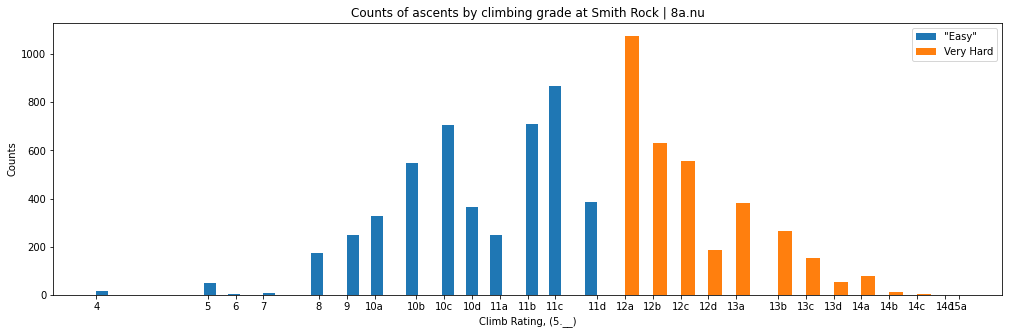

In [9]:
plt.figure(figsize=[17,5])
plt.hist(df_e_smith['grade_id'],bins=len(df_e_smith['grade_id'].unique())*3,label='\"Easy\"')
plt.hist(df_h_smith['grade_id'],bins=len(df_h_smith['grade_id'].unique())*2,label='Very Hard')
#locs = sorted(df_h_smith['grade_id'].unique())
locs = list(yds_grade.keys())
plt.xticks(ticks=locs,labels=[yds_grade[x] for x in locs])
plt.title('Counts of ascents by climbing grade at Smith Rock | 8a.nu')
plt.xlabel('Climb Rating, (5.__)')
plt.ylabel('Counts')


plt.legend();

plt.savefig('SmithAscentsByGrade.png',bbox_inches='tight')
plt.show()

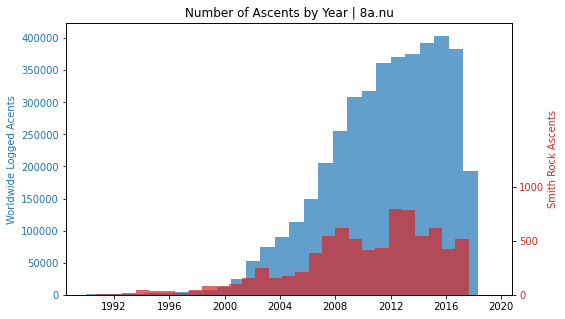

In [10]:
smith_dates = pd.to_datetime(df_smith.date,unit='s')
all_dates = pd.to_datetime(df_ascent.date,unit='s')

fig, ax = plt.subplots()
fig.set_size_inches([8,5])
color = 'tab:blue'
ax.hist(all_dates[all_dates > '1990-01-01'],bins=2018-1990, alpha=.7,label='All Ascents')
ax.set_ylabel('Worldwide Logged Acents',color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'tab:red'
ax2.hist(smith_dates[smith_dates > '1990-01-01'],bins=2018-1990, alpha=.7, color = 'tab:red', label='Smith Rock Ascents')
ax2.set_ylabel('Smith Rock Ascents', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ylim = ax2.get_ylim()
ax2.set_ylim([ylim[0],ylim[1]*3])
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[:3])

ax2.set_title('Number of Ascents by Year | 8a.nu');

plt.savefig('AllAscentsByYear.png',bbox_inches='tight')
plt.show()

In [14]:
df_h_smith.date = pd.to_datetime(df_h_smith.date, unit='s')

In [23]:
df_smith.date = df_smith.date = pd.to_datetime(df_smith.date, unit='s').dt.date

In [16]:
df_h_smith.date.iloc[0]

Timestamp('1999-03-24 23:00:00')

In [17]:
pd.to_datetime('1999-03-24 23:00:00')

Timestamp('1999-03-24 23:00:00')

In [28]:
daily_sends = df_smith.date.value_counts()

In [32]:
daily_sends.sort_index(inplace=True)

In [33]:
daily_sends

1970-01-01    2
1988-10-06    1
1988-10-13    1
1988-10-15    1
1989-09-30    1
             ..
2017-08-15    1
2017-08-17    1
2017-08-18    4
2017-08-19    1
2017-08-20    7
Name: date, Length: 2844, dtype: int64

In [36]:
from fbprophet import Prophet

In [56]:
pdf = pd.DataFrame(daily_sends)
#pdf['DS'] = pdf.index
pdf.reset_index(inplace=True)
pdf.drop(index=pdf.index[-1],inplace=True)

In [58]:
pdf.rename(columns={'index':'ds','date':'y'},inplace=True)

In [120]:
m = Prophet(yearly_seasonality = True, mcmc_samples=300)
m.add_country_holidays(country_name='US')

m.fit(pdf[pdf.ds > pd.to_datetime('2000-01-01')])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
future = m.make_future_dataframe(periods=365)

In [122]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2960,2018-08-16,2.3392,-2.3230,5.6024,1.8924,2.7605,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.7225,-1.1755,-0.2573,0.0000,0.0000,0.0000,-0.1499,-0.3557,0.0523,-0.5725,-0.9909,-0.1670,0.0000,0.0000,0.0000,1.6167
2961,2018-08-17,2.3387,-1.8514,6.3861,1.8919,2.7608,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0143,-0.4827,0.4229,0.0000,0.0000,0.0000,0.5909,0.4018,0.7737,-0.6052,-1.0224,-0.1916,0.0000,0.0000,0.0000,2.3244
2962,2018-08-18,2.3383,-1.8771,6.0501,1.8913,2.7610,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1241,-0.5815,0.2960,0.0000,0.0000,0.0000,0.5062,0.3523,0.6705,-0.6303,-1.0464,-0.2198,0.0000,0.0000,0.0000,2.2142
2963,2018-08-19,2.3378,-2.3488,5.9837,1.8905,2.7612,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4755,-0.9274,-0.0554,0.0000,0.0000,0.0000,0.1722,-0.0226,0.3636,-0.6477,-1.0597,-0.2294,0.0000,0.0000,0.0000,1.8623
2964,2018-08-20,2.3373,-3.0451,5.4025,1.8897,2.7615,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.2724,-1.7092,-0.8108,0.0000,0.0000,0.0000,-0.6147,-0.8391,-0.4081,-0.6577,-1.0704,-0.2275,0.0000,0.0000,0.0000,1.0649


(730120.0, 737060.0)

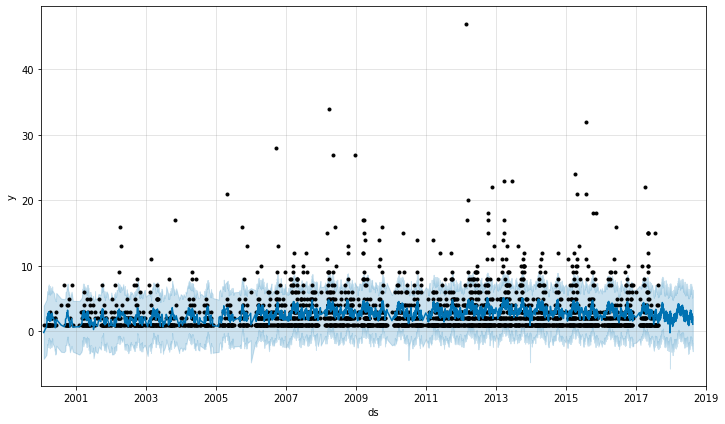

In [123]:
fig1 = m.plot(forecast)
plt.xlim(pd.to_datetime(['2000','2019']))

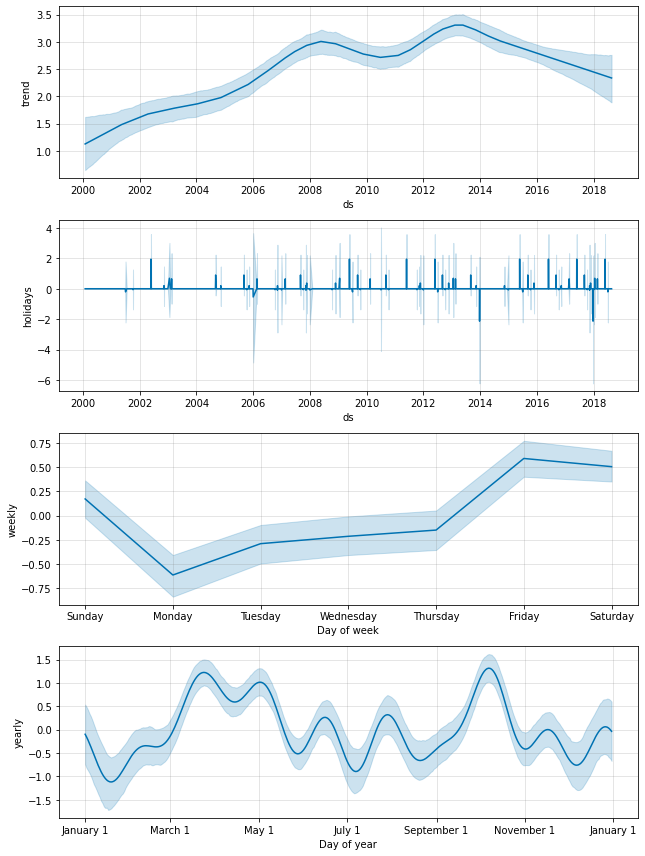

In [124]:
fig2 = m.plot_components(forecast)

In [119]:
type(fig2)

matplotlib.figure.Figure

In [85]:
for idx, ascents in zip(daily_sends.index,daily_sends.values):
    print(idx, ascents)

1970-01-01 2
1988-10-06 1
1988-10-13 1
1988-10-15 1
1989-09-30 1
1990-09-04 1
1990-09-10 1
1990-09-12 1
1990-09-26 1
1990-09-30 2
1990-10-14 1
1990-10-21 1
1990-10-22 1
1990-10-23 1
1990-12-31 1
1991-10-15 1
1991-11-01 1
1991-11-06 1
1992-02-24 1
1992-03-11 1
1992-03-16 1
1992-04-07 1
1992-04-09 1
1992-04-16 1
1992-04-25 1
1992-04-30 1
1992-09-29 1
1993-02-28 2
1993-03-25 1
1993-03-31 1
1993-04-01 1
1993-04-04 1
1993-04-09 1
1993-04-30 1
1993-05-05 1
1993-06-03 1
1993-06-04 1
1993-06-30 1
1993-08-19 1
1993-08-22 1
1993-09-10 3
1993-09-11 5
1993-09-13 2
1993-09-14 5
1993-09-15 4
1993-09-18 6
1993-09-19 3
1993-09-21 1
1993-09-22 3
1993-09-24 2
1993-09-25 1
1993-09-26 4
1993-09-30 1
1993-10-07 1
1993-10-10 1
1993-11-12 1
1994-04-05 1
1994-04-14 1
1994-04-21 1
1994-07-31 1
1994-10-04 1
1994-10-06 1
1994-10-09 1
1994-10-10 1
1994-10-13 1
1994-10-18 1
1994-10-19 1
1994-10-21 1
1994-10-23 1
1994-10-25 1
1994-10-26 1
1994-10-27 2
1994-11-29 1
1995-02-28 5
1995-03-09 1
1995-03-11 1
1995-03-14 1

In [97]:
daily_sends = daily_sends[:-1]

In [100]:
daily_sends.value_counts(normalize=True) * 100

1    44.0225
2    20.3586
3    12.0605
4     7.3840
5     4.4655
6     2.8129
7     2.4613
8     1.5823
9     1.4065
10    0.7384
11    0.4923
12    0.4219
15    0.3165
13    0.2813
17    0.2110
14    0.1758
16    0.1758
18    0.1055
21    0.1055
22    0.0703
23    0.0703
27    0.0703
34    0.0352
20    0.0352
24    0.0352
28    0.0352
32    0.0352
47    0.0352
Name: date, dtype: float64

In [102]:
daily_sends.values.T

array([2, 1, 1, ..., 4, 1, 7], dtype=object)

In [104]:
daily_sends.to_pickle('./smith_ascents.pkl')